# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_current_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_current_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $15539.45
The current value of your 5.3 ETH is $2182.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_YORK").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
spy_agg_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
spy_agg_df

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3483335  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38762783

In [9]:
# Pick AGG and SPY close prices
spy_close_price = float(spy_agg_df["SPY"]["close"])
agg_close_price = float(spy_agg_df["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares = my_spy_value + my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df = {"amount": [crypto, shares]}
df_savings = pd.DataFrame(df, columns = ["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,17722.359
shares,40782.000


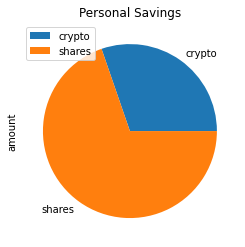

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value
difference = emergency_fund - total_savings

# Validate saving health
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You've reached your financial goal.")
elif total_savings < emergency_fund:
    print(f"You are ${difference} away from reaching the goal.")

You are $18277.641 away from reaching the goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995843,0.999622,0.994532,0.990701,1.001618,0.999325,0.997439,1.003573,0.994617,0.997278,...,1.009340,1.004848,0.991505,1.004490,1.003727,1.009350,0.991326,0.992148,0.998979,1.004916
2,0.988856,0.991997,0.991899,0.988706,1.010538,1.005765,1.000271,1.012569,0.994059,1.002852,...,1.013958,1.011740,0.990748,1.000932,1.007633,1.012226,1.000712,0.984115,1.005391,1.006218
3,0.981333,0.989959,0.998325,1.012859,1.022407,0.992680,1.001841,1.008785,1.001856,1.009804,...,0.997684,1.006441,0.981149,0.991800,0.991788,1.013629,1.008009,0.970145,1.007315,1.009955
4,0.985848,0.980663,1.004550,1.022171,1.013233,0.975160,0.998697,1.021682,0.997355,1.017326,...,1.009319,1.008433,0.988695,0.990057,0.991511,1.021331,1.008454,0.971565,1.010379,1.013855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.806997,3.889818,3.745547,8.229493,14.759111,29.899969,3.106003,11.350783,4.032267,3.060797,...,7.273278,3.412845,4.270643,15.255040,19.951391,1.456002,1.167448,6.990577,78.871545,4.032918
7557,4.757874,3.908380,3.782636,8.248778,14.709785,30.041058,3.067851,11.411362,4.088692,3.059236,...,7.279460,3.420891,4.295572,15.278962,19.888264,1.449282,1.170995,6.955595,78.012025,4.043470
7558,4.779489,3.945787,3.749993,8.346554,14.538868,29.829853,3.049250,11.352764,4.060994,3.046865,...,7.333527,3.392022,4.288900,15.363005,19.832547,1.450049,1.178145,6.993472,77.662975,4.067322
7559,4.742356,3.951033,3.788297,8.439321,14.487532,29.349239,3.064574,11.391482,4.079816,3.039727,...,7.350170,3.403702,4.280234,15.173373,19.868362,1.454941,1.190030,7.087680,78.272885,4.076500


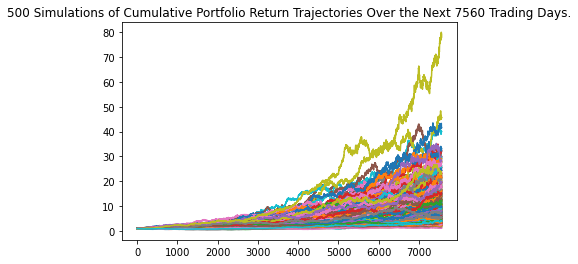

In [19]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

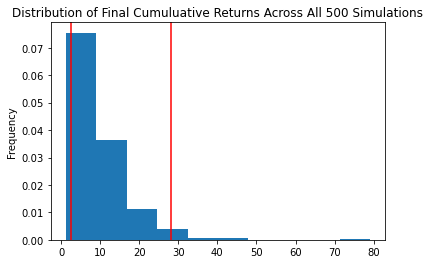

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean             10.053960
std               7.318468
min               1.196561
25%               5.261008
50%               7.943785
75%              12.670062
max              79.090463
95% CI Lower      2.421207
95% CI Upper     28.192417
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*20000,2)
ci_upper = round(summary_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48424.15 and $563848.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8]*30000,2)
ci_upper = round(summary_stat[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72636.22 and $845772.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002510,0.994349,1.017282,1.009858,0.990665,0.992953,1.001615,1.004275,1.010135,1.009184,...,1.009106,0.978345,1.010697,0.997804,1.018286,0.987609,1.007590,0.993053,1.010816,1.003282
2,0.993977,0.991833,1.028283,1.006898,0.994925,0.988268,0.985463,1.003238,1.004685,1.010779,...,1.007253,0.980468,1.007681,1.000355,1.030152,0.977424,1.009889,0.985314,1.001708,0.991520
3,0.991524,0.978645,1.024183,1.010116,1.001636,0.989846,0.980439,1.016586,1.011480,1.009908,...,0.995659,0.977721,1.005538,1.000227,1.029164,0.988459,1.011944,0.979210,0.992765,0.994910
4,0.989099,0.972360,1.035642,0.997242,1.006753,0.975341,0.979456,1.013514,1.017669,1.000322,...,1.004278,0.983378,1.004182,1.001118,1.031135,1.006478,1.008670,0.993265,0.985668,0.987763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.470885,0.908772,1.652190,1.063185,1.803606,1.782156,1.838376,1.816339,1.280708,1.210667,...,1.657568,1.807759,1.180336,1.742999,1.296552,1.039046,1.827659,1.196822,0.970266,1.708430
1257,1.464298,0.912262,1.648413,1.059028,1.785922,1.781328,1.845504,1.807868,1.266965,1.232805,...,1.646330,1.828980,1.185235,1.725858,1.304239,1.031883,1.807841,1.202197,0.973102,1.710641
1258,1.472099,0.908404,1.641716,1.048341,1.775896,1.790726,1.861240,1.790503,1.289551,1.233861,...,1.662072,1.839452,1.190319,1.737522,1.312826,1.038035,1.823422,1.194650,0.976799,1.710016
1259,1.481757,0.914980,1.648302,1.057792,1.794534,1.794448,1.874969,1.797774,1.293197,1.232525,...,1.677665,1.866890,1.197646,1.767979,1.332508,1.032993,1.820578,1.199569,0.990222,1.691813


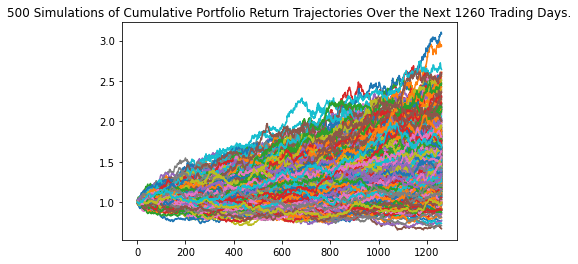

In [26]:
# Plot simulation outcomes
line_plot1 = MC_5_year.plot_simulation()

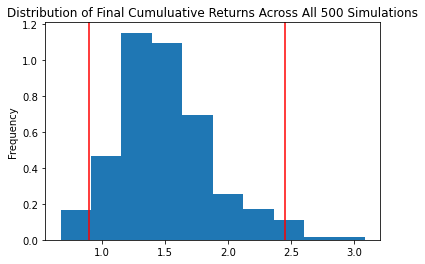

In [27]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_5_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat1 = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stat1)

count           500.000000
mean              1.501833
std               0.381017
min               0.669589
25%               1.242654
50%               1.464639
75%               1.685598
max               3.085153
95% CI Lower      0.898923
95% CI Upper      2.447225
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stat1[8]*60000,2)
ci_upper_five = round(summary_stat1[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53935.36 and $146833.5


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989454,0.999733,1.007228,0.996856,1.001768,0.991902,1.010785,0.993918,1.009404,1.008692,...,0.995692,1.000245,0.994926,0.995997,0.990750,1.006768,1.011043,1.005609,0.995055,1.010146
2,0.985946,0.989324,1.010280,0.999560,0.992459,0.997215,1.000249,0.993919,1.010783,1.008867,...,0.999834,1.001195,0.984534,0.998666,0.986562,0.998378,1.009470,1.004774,0.992453,1.009044
3,0.982641,0.970804,0.999794,1.010041,0.994625,0.992979,1.008464,1.006645,1.002185,1.014568,...,0.998910,1.006304,0.976895,1.016478,0.996162,0.999114,1.016017,1.013884,0.983290,1.009010
4,0.990892,0.977148,1.014582,1.010515,0.989823,0.992137,1.012879,1.003079,1.008187,1.012623,...,0.997582,1.005103,0.977337,0.999354,0.985070,0.989100,1.014401,1.015668,0.985286,1.017577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.458079,1.649390,1.430410,1.408649,2.767206,3.190042,1.387327,1.991051,1.546786,1.897754,...,2.732287,2.852784,2.013382,2.173533,1.693749,1.747097,1.935112,1.091522,2.445827,2.173771
2517,3.442147,1.652235,1.418667,1.427719,2.749203,3.189070,1.408100,1.987837,1.538566,1.907382,...,2.695123,2.862702,2.008210,2.165572,1.667750,1.742934,1.929631,1.090979,2.445388,2.175927
2518,3.486556,1.652035,1.408214,1.435161,2.768620,3.213734,1.389818,2.006234,1.529165,1.896646,...,2.695860,2.848295,2.017573,2.140137,1.659922,1.769231,1.940855,1.094518,2.459931,2.170804
2519,3.487506,1.670552,1.420118,1.428585,2.778908,3.205327,1.388910,1.981613,1.525125,1.904716,...,2.701938,2.851456,1.998772,2.150528,1.643267,1.771532,1.926022,1.101659,2.439512,2.154192


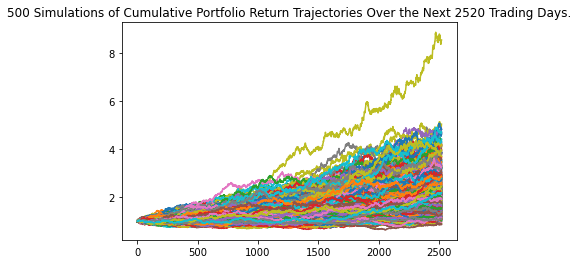

In [33]:
# Plot simulation outcomes
line_plot2 = MC_10_year.plot_simulation()

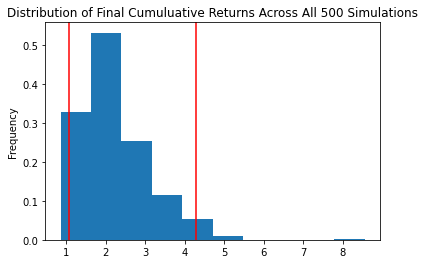

In [34]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_10_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat2 = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stat2)

count           500.000000
mean              2.227376
std               0.872710
min               0.857405
25%               1.623558
50%               2.082175
75%               2.619280
max               8.554771
95% CI Lower      1.074816
95% CI Upper      4.277277
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 20000 * 5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stat2[8]*100000,2)
ci_upper_ten = round(summary_stat2[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $107481.61 and $427727.69
